In [1]:
include("./trajopt/utils.jl")
include("./trajopt/dynamics.jl")
include("./trajopt/constraint.jl")
include("./trajopt/costfunction.jl")
include("./trajopt/scaling.jl")
include("./trajopt/scp.jl")
include("./trajopt/discretize.jl")

discretize_foh

In [2]:
ix = 3
iu = 2
N = 4
dynamics = Unicycle()

Unicycle(3, 2, 2, 2, 2, 2, [0.0 0.0 1.0; 0.0 0.0 0.0], [0.0 0.0; 1.0 0.0], [1 0; 0 1; 0 0], [0.0 0.0 1.0; 0.0 0.0 0.0], [0.0 0.0; 1.0 0.0], [0.0, 0.0])

In [3]:
function get_H_obs(rx,ry)
    return diagm([1/rx,1/ry])
end
c_list = []
H_list = []
c1 = [1,2]
H1 = get_H_obs(0.75,1.5)
push!(c_list,c1)
push!(H_list,H1)
c2 = [4,3]
H2 = get_H_obs(0.75,1.5)
push!(c_list,c2)
push!(H_list,H2)

2-element Vector{Any}:
 [1.3333333333333333 0.0; 0.0 0.6666666666666666]
 [1.3333333333333333 0.0; 0.0 0.6666666666666666]

In [4]:
vmax = 2
vmin = 0
wmax = 1
wmin = -1
Ac = [1 0;0 1;-1 0;0 -1];
bc = [vmax;wmax;-vmin;-wmin];
input_const = InputLinear(Ac,bc)
obstacle_const1 = Obstacle(H_list[1],c_list[1])
obstacle_const2 = Obstacle(H_list[2],c_list[2])
list_const = [input_const,obstacle_const1,obstacle_const2]

3-element Vector{Constraint}:
 InputLinear([1 0; 0 1; -1 0; 0 -1], [2, 1, 0, 1])
 Obstacle([1.3333333333333333 0.0; 0.0 0.6666666666666666], [1, 2])
 Obstacle([1.3333333333333333 0.0; 0.0 0.6666666666666666], [4, 3])

In [5]:
xi = [0;0;0];
xf = [5;5;0];

In [6]:
x0 = zeros(ix,N+1);
u0 = 0.1*ones(iu,N+1);
tf0 = 5.0;
dt0 = tf0/N*ones(N);
for i = 1:N+1
    x0[:,i] = (N-i+1)/N*xi+(i-1)/N*xf;
end

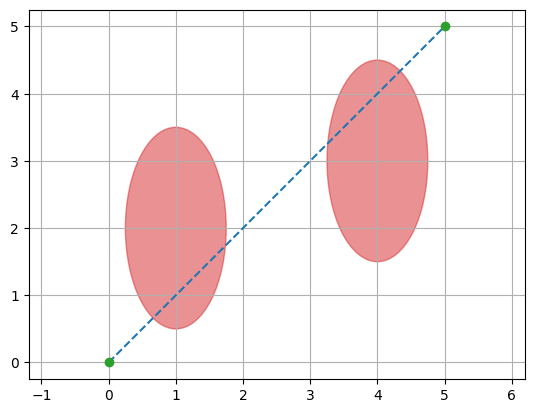

In [7]:
plt.figure()
ax = plt.subplot(111)
for (ce, H) in zip(c_list, H_list)
    rx = 1 / H[1, 1]  # Adjusted indexing for Julia (1-based indexing)
    ry = 1 / H[2, 2]  # Adjusted indexing for Julia
    circle1 = matplotlib[:patches][:Ellipse]((ce[1], ce[2]), width=rx*2, height=ry*2, color="tab:red", alpha=0.5, fill=true)
    ax[:add_patch](circle1)  # Using add_patch method to add the ellipse to the plot
end
ax.plot(x0[1,:],x0[2,:],"--",color="tab:blue")
ax.plot(xi[1],xi[2],"o",color="tab:green")
ax.plot(xf[1],xf[2],"o",color="tab:green")
ax.grid(true)
ax[:axis]("equal")
gcf()

In [11]:
xmin = [0;0;0];
xmax = [5;5;pi];
umin = [0;0];
umax = [2;1];
min_dt = 0.1;
# max_dt = 0.5;
max_dt = 2;
scaler = Scaling(xmin, xmax, umin, umax, tf0, min_dt,max_dt)
@assert max_dt * N >= tf0 

In [12]:
max_iter = 30;
w_tf = 0.0;
w_c = 1e-1;
w_rate = 1e-3;
w_param = 0.0;
w_vc = 1e2;
w_tr::Float64 = 5*1e-1;
tol_vc = 1e-6;
tol_tr = 1e-4;
tol_dyn = 1e-1;
tr_norm = "quad";
verbosity = true;

In [13]:
ptr = PTR(N,tf0,max_iter,dynamics,list_const,scaler,
    w_tf,w_c,w_rate,w_param,w_vc,w_tr,
    tol_vc,tol_tr,tol_dyn,
    tr_norm,verbosity)

PTR(Unicycle(3, 2, 2, 2, 2, 2, [0.0 0.0 1.0; 0.0 0.0 0.0], [0.0 0.0; 1.0 0.0], [1 0; 0 1; 0 0], [0.0 0.0 1.0; 0.0 0.0 0.0], [0.0 0.0; 1.0 0.0], [0.0, 0.0]), Constraint[InputLinear([1 0; 0 1; -1 0; 0 -1], [2, 1, 0, 1]), Obstacle([1.3333333333333333 0.0; 0.0 0.6666666666666666], [1, 2]), Obstacle([1.3333333333333333 0.0; 0.0 0.6666666666666666], [4, 3])], Scaling([5.0 0.0 0.0; 0.0 5.0 0.0; 0.0 0.0 3.141592653589793], [0.2 0.0 0.0; 0.0 0.2 0.0; 0.0 0.0 0.3183098861837907], [0.0, 0.0, 0.0], [2.0 0.0; 0.0 1.0], [0.5 0.0; 0.0 1.0], [0.0, 0.0], 5.0, 0.1, 2.0, 2.2025344754e-314), Solution([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0, 0.0, 0.0, 0.0], [0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0], [0.0 0.0; 0.0 0.0; 0.0 0.0;;; 0.0 0.0; 0.0 0.0; 0.0 0.0;;; 0.0 0.0; 0.0 0.0; 0.0 0.0;;; 0.0 0.0; 0.0 0.0; 0.0 0.0], [0.0 0.0; 0

In [14]:
import Gurobi
run(ptr,x0,u0,dt0,xi,xf,Gurobi)

Set parameter Username
Academic license - for non-commercial use only - expires 2024-11-27
+--------------------------------------------------------------------------------------------------+
|                                   ..:: Penalized Trust Region ::..                               |
+-------+------------+-----------+-----------+-----------+---------+---------+----------+----------+
| iter. |    cost    |    tof    |   main    |   rate    |  param  | log(vc) | log(tr)  | log(dyn) |
+-------+------------+-----------+-----------+-----------+---------+---------+----------+----------+
|1      |86.50       |5.000     |9.141      |2.299      |-1.000    |-0.1     | 0.8      |2.6e-01   |
|2      |1.71        |5.000     |9.108      |0.634      |-1.000    |-8.6     | 0.2      |-1.0e-01   |
|3      |1.27        |5.000     |11.401     |1.170      |-1.000    |-11.2    | -0.6     |-7.9e-01   |
|4      |1.18        |5.000     |11.742     |1.154      |-1.000    |-8.8     | -1.7     |-2.1e+00  

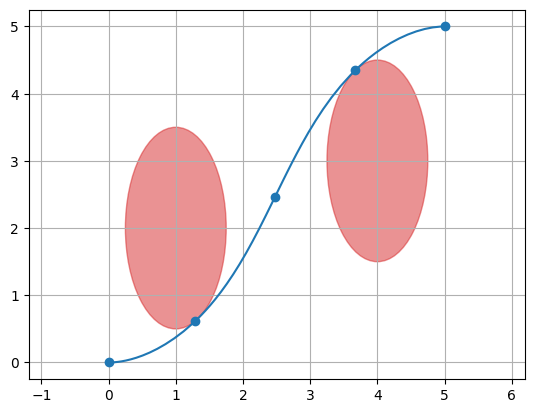

In [15]:
plt.figure()
ax = plt.subplot(111)
for (ce, H) in zip(c_list, H_list)
    rx = 1 / H[1, 1]  # Adjusted indexing for Julia (1-based indexing)
    ry = 1 / H[2, 2]  # Adjusted indexing for Julia
    circle1 = matplotlib[:patches][:Ellipse]((ce[1], ce[2]), width=rx*2, height=ry*2, color="tab:red", alpha=0.5, fill=true)
    ax[:add_patch](circle1)  # Using add_patch method to add the ellipse to the plot
end
ax.plot(ptr.solution.x[1,:],ptr.solution.x[2,:],"o",color="tab:blue")
ax.plot(ptr.solution.xprop[1,:],ptr.solution.xprop[2,:],"-",color="tab:blue")
ax.grid(true)
ax[:axis]("equal")
gcf()

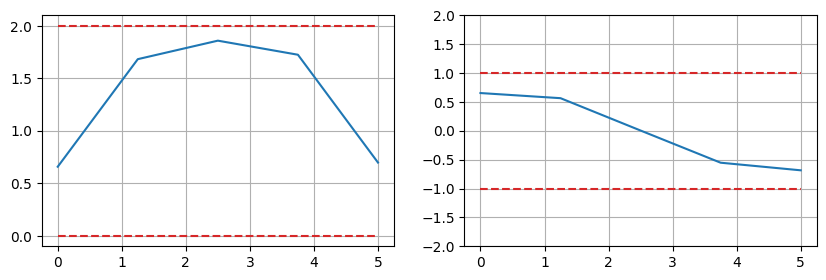

In [16]:
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.plot(ptr.solution.t,ptr.solution.u[1,:])
plt.plot(ptr.solution.t,ptr.solution.t*0 .+ vmax,"--",color="tab:red")
plt.plot(ptr.solution.t,ptr.solution.t*0 .+ vmin,"--",color="tab:red")
plt.ylim([-0.1,2.1])
plt.grid(true)
plt.subplot(122)
plt.plot(ptr.solution.t,ptr.solution.u[2,:])
plt.plot(ptr.solution.t,ptr.solution.t*0 .+ wmax,"--",color="tab:red")
plt.plot(ptr.solution.t,ptr.solution.t*0 .+ wmin,"--",color="tab:red")
plt.ylim([-2,2])
plt.grid(true)
gcf()

# save

In [17]:
my_dict = Dict("x" => ptr.solution.x, "u" => ptr.solution.u, "t" => ptr.solution.t)

Dict{String, Array{Float64}} with 3 entries:
  "t" => [0.0, 1.25, 2.5, 3.75, 5.0]
  "x" => [0.0 1.29005 … 3.67222 5.0; 0.0 0.616683 … 4.34922 5.0; 0.0 0.761114 ……
  "u" => [0.657707 1.6821 … 1.72424 0.697281; 0.653354 0.564428 … -0.55295 -0.6…

In [18]:
using JLD2, FileIO

@save "./data/nominal_traj_unicycle_N4" my_dict

In [ ]:
# using CSV, DataFrames
# df = DataFrame(ptr.solution.x, :auto)
# CSV.write("./data/nominal_traj_x_unicycle_0324.csv",df)
# df = DataFrame(ptr.solution.u, :auto)
# CSV.write("./data/nominal_traj_u_unicycle_0324.csv",df)
# df = DataFrame(vec=ptr.solution.t)
# CSV.write("./data/nominal_traj_t_unicycle_0324.csv",df)